# <div align="center">**Maternal Mortality Rates in the United States, 2019-2023**
---

## Introduction

#### Health disparities are intricately linked to social determinants of health (SDOH). Factors such as socioeconomic status, race and ethnicity, access to healthcare, and education play a critical role in shaping the overall health outcomes in the United States [1]. It has been reported that Black Americans experience higher mortality rates than other racial and ethnic groups for numerous diseases and conditions including maternal mortality [1]. The U.S. has two to three times the maternal mortality rates of other high-income countries [2], making Black women disproportionally affected in the U.S. with rates two times as high as white women [2].

#### The main goal of our analysis is to provide clinicians, and policy makers with a complete analysis of maternal mortality rates in the United States over a four-year period between June 2019 and June 2023, with state specific data from 2018-2022. Using two datasets on the provisional maternal mortality rates from the National Center for Health statistics, we will highlight race and age-related disparities in maternal deaths and how they may have been impacted by the COVID-19 pandemic. We will explore the maternal mortality rate for three different age groups, under 25, 25 to 39 and 40 and over. For further examination, we will use the data to show how the maternal mortality rate varies between race and Hispanic origin over the four-year period.

1.	National Center for Health Statistics. Health, United States, 2020–2021: Annual Perspective. Hyattsville, Maryland. 2023. DOI: https://dx.doi.org/10.15620/cdc:122044. 
2.	Gunja MZ, Gumas ED, Masitha R, et al. Insights into the U.S. maternal mortality crisis: An international comparison. Commonwealth Fund. https://doi.org/10.26099/cthn-st75 Published June 4, 2024. Accessed October 31, 2024
 -----

In [1]:
#import the dataset for total population, age, and race and ethnicity 

import pandas as pd
from pathlib import Path

file_path = Path('mmr.csv')

df = pd.read_csv(file_path)

df.head()

,Data As Of,Jurisdiction,Group,Subgroup,Year of Death,Month of Death,Time Period,Month Ending Date,Maternal Deaths,Live Births,Maternal Mortality Rate,Footnote
0,10/6/24,United States,Total,Total,2019,1,12 month-ending,1/31/19,660.0,3787776,17.4,NaN
1,10/6/24,United States,Total,Total,2019,2,12 month-ending,2/28/19,653.0,3783489,17.3,NaN
2,10/6/24,United States,Total,Total,2019,3,12 month-ending,3/31/19,657.0,3771682,17.4,NaN
3,10/6/24,United States,Total,Total,2019,4,12 month-ending,4/30/19,668.0,3772235,17.7,NaN
4,10/6/24,United States,Total,Total,2019,5,12 month-ending,5/31/19,706.0,3767999,18.7,NaN


Dataset: Provisional Maternal Death Counts and Rates (2019-2024) from the National Center for Health Statistics. https://data.cdc.gov/NCHS/VSRR-Provisional-Maternal-Death-Counts-and-Rates/e2d5-ggg7/about_data

In [3]:
#check dataset for duplicates

df = df.drop_duplicates()

df.shape

(660, 12)

In [5]:
#delete columns that are not relevant

df = df.drop(columns=['Time Period', 'Month Ending Date', 'Footnote'])

df.head()

,Data As Of,Jurisdiction,Group,Subgroup,Year of Death,Month of Death,Maternal Deaths,Live Births,Maternal Mortality Rate
0,10/6/24,United States,Total,Total,2019,1,660.0,3787776,17.4
1,10/6/24,United States,Total,Total,2019,2,653.0,3783489,17.3
2,10/6/24,United States,Total,Total,2019,3,657.0,3771682,17.4
3,10/6/24,United States,Total,Total,2019,4,668.0,3772235,17.7
4,10/6/24,United States,Total,Total,2019,5,706.0,3767999,18.7


In [7]:
#remove data from 2024 (only January to June)

remove_year = df[(df['Year of Death'] == 2024)].index
df.drop(remove_year, inplace=True)
df.head()

,Data As Of,Jurisdiction,Group,Subgroup,Year of Death,Month of Death,Maternal Deaths,Live Births,Maternal Mortality Rate
0,10/6/24,United States,Total,Total,2019,1,660.0,3787776,17.4
1,10/6/24,United States,Total,Total,2019,2,653.0,3783489,17.3
2,10/6/24,United States,Total,Total,2019,3,657.0,3771682,17.4
3,10/6/24,United States,Total,Total,2019,4,668.0,3772235,17.7
4,10/6/24,United States,Total,Total,2019,5,706.0,3767999,18.7


In [9]:
#separate data by 'Group' for Total Population

df_total = df[df['Group'] == 'Total']
df_total.head()


,Data As Of,Jurisdiction,Group,Subgroup,Year of Death,Month of Death,Maternal Deaths,Live Births,Maternal Mortality Rate
0,10/6/24,United States,Total,Total,2019,1,660.0,3787776,17.4
1,10/6/24,United States,Total,Total,2019,2,653.0,3783489,17.3
2,10/6/24,United States,Total,Total,2019,3,657.0,3771682,17.4
3,10/6/24,United States,Total,Total,2019,4,668.0,3772235,17.7
4,10/6/24,United States,Total,Total,2019,5,706.0,3767999,18.7


In [11]:
#check number of rows

df_total.shape


(60, 9)

In [13]:
#remove missing data and check shape

df_total = df_total.dropna()

df_total.shape

(60, 9)

In [15]:
#save clean data as new file

df_total.to_csv("df_total_cln.csv")


In [17]:
#call the new clean data for Total Population

import pandas as pd
from pathlib import Path

file_path = Path('df_total_cln.csv')

df_total_cln = pd.read_csv(file_path)

df_total_cln.head()


,Unnamed: 0,Data As Of,Jurisdiction,Group,Subgroup,Year of Death,Month of Death,Maternal Deaths,Live Births,Maternal Mortality Rate
0,0,10/6/24,United States,Total,Total,2019,1,660.0,3787776,17.4
1,1,10/6/24,United States,Total,Total,2019,2,653.0,3783489,17.3
2,2,10/6/24,United States,Total,Total,2019,3,657.0,3771682,17.4
3,3,10/6/24,United States,Total,Total,2019,4,668.0,3772235,17.7
4,4,10/6/24,United States,Total,Total,2019,5,706.0,3767999,18.7


In [19]:
#separate data by 'Group' for Age

df_age = df[df['Group'] == 'Age']
df_age.head()


,Data As Of,Jurisdiction,Group,Subgroup,Year of Death,Month of Death,Maternal Deaths,Live Births,Maternal Mortality Rate
12,10/6/24,United States,Age,Under 25 years,2019,1,98.0,904573,10.8
13,10/6/24,United States,Age,Under 25 years,2019,2,103.0,901429,11.4
14,10/6/24,United States,Age,Under 25 years,2019,3,101.0,896332,11.3
15,10/6/24,United States,Age,Under 25 years,2019,4,107.0,894830,12.0
16,10/6/24,United States,Age,Under 25 years,2019,5,113.0,892029,12.7


In [21]:
#check number of rows

df_age.shape


(180, 9)

In [23]:
#remove missing data and check shape

df_age = df_age.dropna()

df_age.shape


(180, 9)

In [25]:
#save clean data as new file

df_age.to_csv("df_age_cln.csv")


In [27]:
#call the new clean data for Age Group

import pandas as pd
from pathlib import Path

file_path = Path('df_age_cln.csv')

df_age_cln = pd.read_csv(file_path)

df_age_cln.head()


,Unnamed: 0,Data As Of,Jurisdiction,Group,Subgroup,Year of Death,Month of Death,Maternal Deaths,Live Births,Maternal Mortality Rate
0,12,10/6/24,United States,Age,Under 25 years,2019,1,98.0,904573,10.8
1,13,10/6/24,United States,Age,Under 25 years,2019,2,103.0,901429,11.4
2,14,10/6/24,United States,Age,Under 25 years,2019,3,101.0,896332,11.3
3,15,10/6/24,United States,Age,Under 25 years,2019,4,107.0,894830,12.0
4,16,10/6/24,United States,Age,Under 25 years,2019,5,113.0,892029,12.7


In [29]:
#separate data by 'Group' for Race and Hispanic origin

df_race = df[df['Group'] == 'Race and Hispanic origin']
df_race.head()


,Data As Of,Jurisdiction,Group,Subgroup,Year of Death,Month of Death,Maternal Deaths,Live Births,Maternal Mortality Rate
48,10/6/24,United States,Race and Hispanic origin,Hispanic,2019,1,90.0,885705,10.2
49,10/6/24,United States,Race and Hispanic origin,Hispanic,2019,2,90.0,885333,10.2
50,10/6/24,United States,Race and Hispanic origin,Hispanic,2019,3,89.0,883687,10.1
51,10/6/24,United States,Race and Hispanic origin,Hispanic,2019,4,96.0,884928,10.8
52,10/6/24,United States,Race and Hispanic origin,Hispanic,2019,5,103.0,884930,11.6


In [31]:
#check number of rows

df_race.shape


(360, 9)

In [33]:
#remove missing data and check shape

df_race = df_race.dropna()

df_race.shape

(254, 9)

In [35]:
#save clean data as new file

df_race.to_csv("df_race_cln.csv")

In [37]:
#call the new clean data for Race and Hispanic Origin 

import pandas as pd
from pathlib import Path

file_path = Path('df_race_cln.csv')

df_race_cln = pd.read_csv(file_path)

df_race_cln.head()

,Unnamed: 0,Data As Of,Jurisdiction,Group,Subgroup,Year of Death,Month of Death,Maternal Deaths,Live Births,Maternal Mortality Rate
0,48,10/6/24,United States,Race and Hispanic origin,Hispanic,2019,1,90.0,885705,10.2
1,49,10/6/24,United States,Race and Hispanic origin,Hispanic,2019,2,90.0,885333,10.2
2,50,10/6/24,United States,Race and Hispanic origin,Hispanic,2019,3,89.0,883687,10.1
3,51,10/6/24,United States,Race and Hispanic origin,Hispanic,2019,4,96.0,884928,10.8
4,52,10/6/24,United States,Race and Hispanic origin,Hispanic,2019,5,103.0,884930,11.6


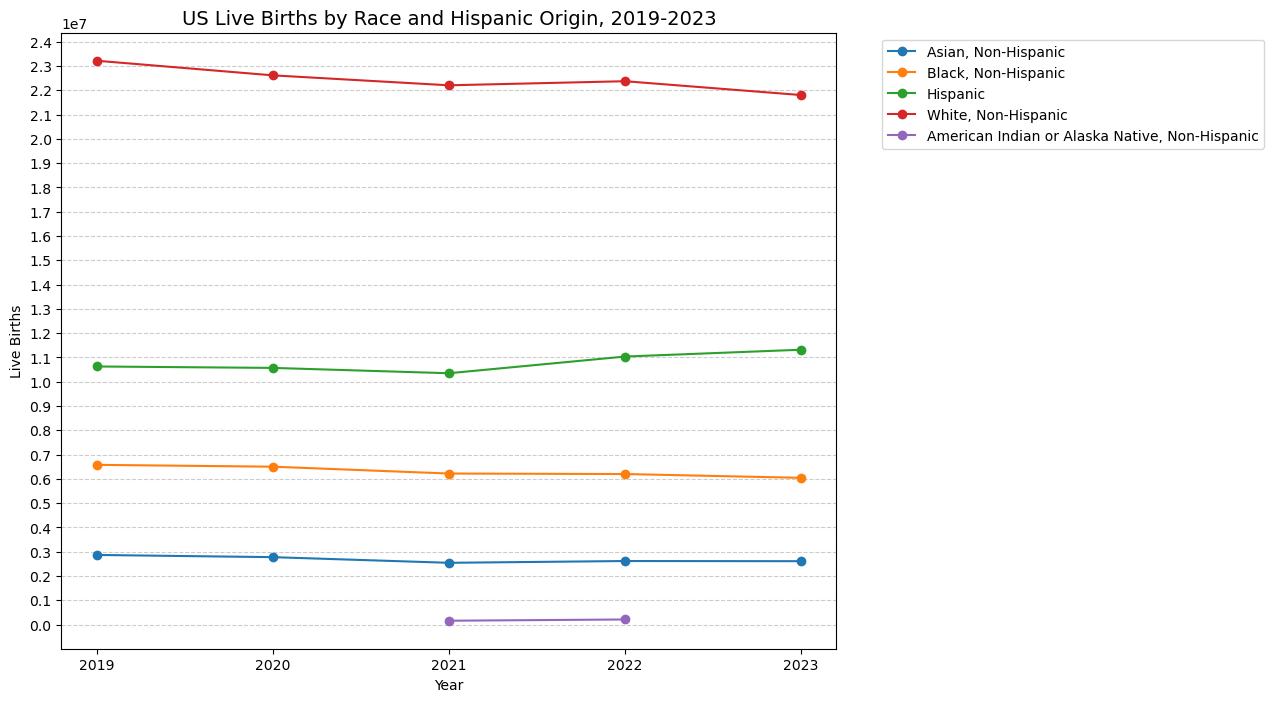

In [39]:
#create line chart to compare number of live births by Race and Hispanic Origin across all years

import numpy as np
import matplotlib
from matplotlib import pyplot as plt

plt.figure(figsize = (10,8))
plt.xlabel('Year')
plt.ylabel('Live Births')
plt.title('US Live Births by Race and Hispanic Origin, 2019-2023', fontsize = 14)
plt.grid(axis = 'y', linestyle = '--', color = 'gray', alpha = 0.4)
plt.yticks(np.arange(0, 30000000, 1000000))

race_group = df_race_cln.groupby(['Year of Death', 'Subgroup'])['Live Births'].sum().reset_index()

race_group['Year of Death'] = race_group['Year of Death'].astype(str)

for subgroup in race_group['Subgroup'].unique():
    subset = race_group.loc[race_group['Subgroup'] == subgroup]
    plt.plot(subset['Year of Death'], subset['Live Births'], label = subgroup, marker = 'o')

plt.legend(loc="upper left", fontsize= 'small')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


---
#### Live births across all races remain mostly stable throughout the COVID-19 pandemic with a small decrease in the white population and a slight increase in the Hispanic population. Note that per the original dataset "Data counts between 1-9 have been suppressed in accordance with NCHS confidentiality standards" and "Rates for deaths counts <20 are unreliable" which is why there is only 2021-2022 data for the American Indian or Alaska Native group and no data for the Native Hawiian or Other Pacific Islander group.
---

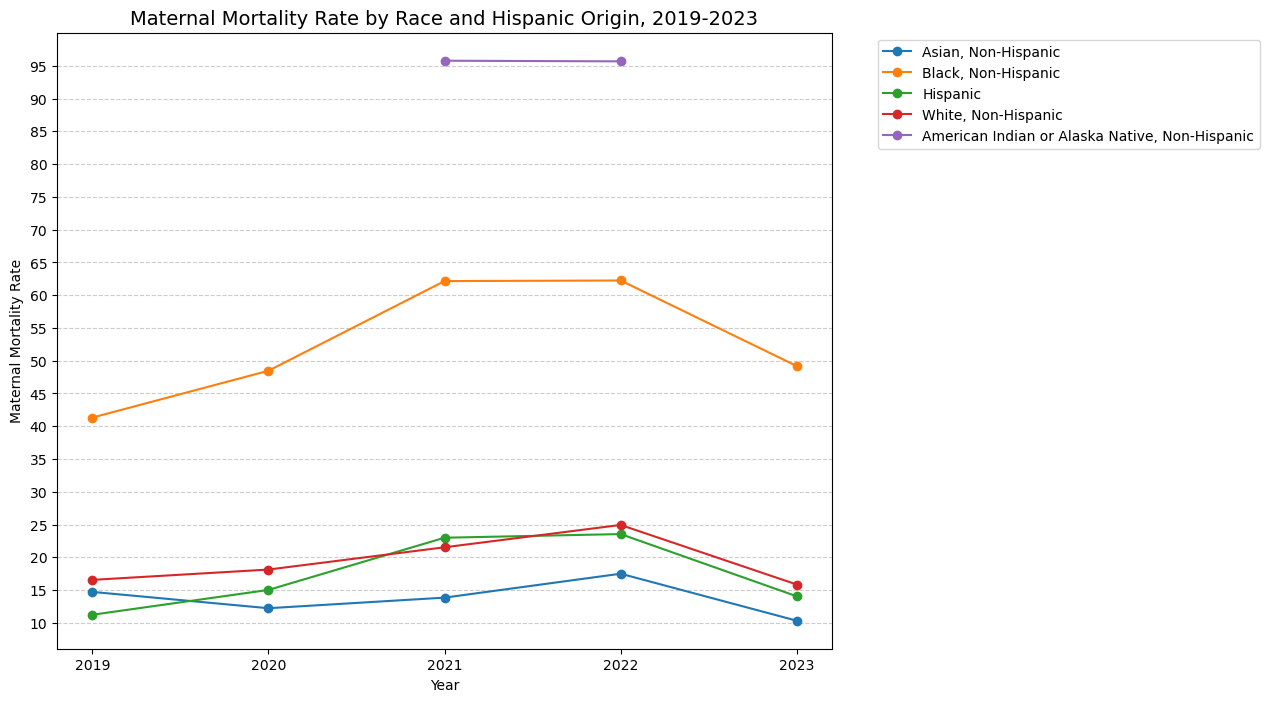

In [41]:
#create line chart to compare the maternal mortality rate by Race and Hispanic Origin across all years

import numpy as np
import matplotlib
from matplotlib import pyplot as plt

%matplotlib inline 

plt.figure(figsize = (10,8))
plt.xlabel('Year')
plt.ylabel('Maternal Mortality Rate')
plt.title('Maternal Mortality Rate by Race and Hispanic Origin, 2019-2023', fontsize= 14)
plt.grid(axis = 'y', linestyle = '--', color = 'gray', alpha = 0.4)
plt.yticks(np.arange(0, 100, 5))

race_group = df_race_cln.groupby(['Year of Death', 'Subgroup'])['Maternal Mortality Rate'].mean().reset_index()

race_group['Year of Death'] = race_group['Year of Death'].astype(str)

for subgroup in race_group['Subgroup'].unique():
    subset = race_group.loc[race_group['Subgroup'] == subgroup]
    plt.plot(subset['Year of Death'], subset['Maternal Mortality Rate'], label = subgroup, marker = 'o')

plt.legend(loc="upper left", fontsize= 'small')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

---
#### The maternal mortality rate is more than double for Black mothers compared to Asian, Hispanic, and white mothers as expected. An unexpected result is the mortality rate for American Indian or Alaka Native mothers which is nearly three times as high as that of Asian, Hispanic, and white mothers. 
---

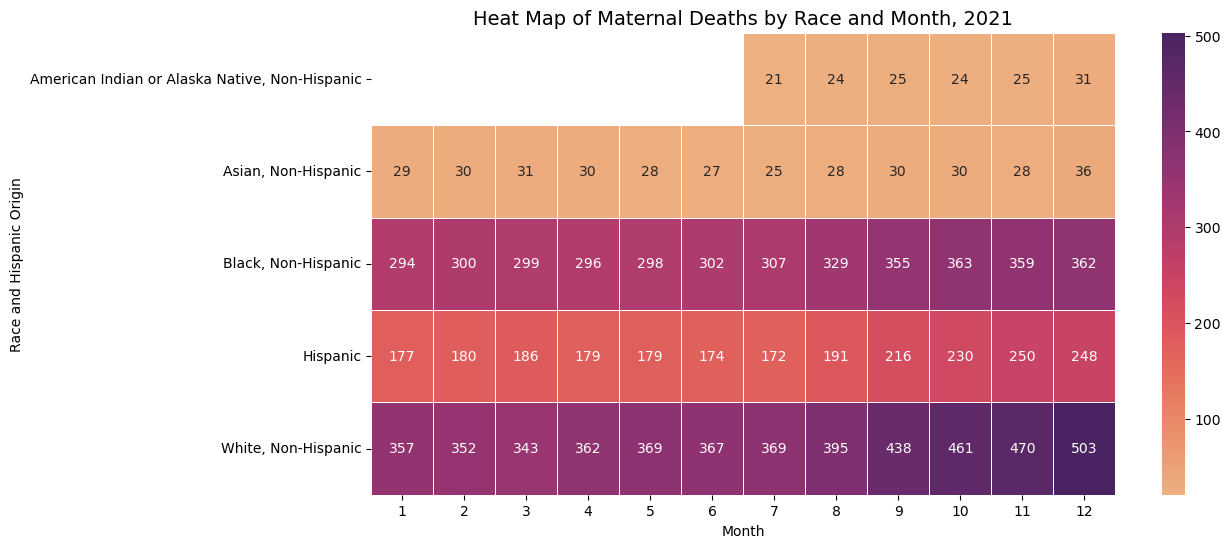

In [47]:
#create heatmap of Maternal Deaths by Race and Month in 2021 to look for effects of COVID-19 surges

import seaborn as sns 
import matplotlib.pyplot as plt

race_month_data_2021 = df_race_cln[df_race_cln['Year of Death'] == 2021]
heatmap_data = race_month_data_2021.pivot_table(values = 'Maternal Deaths', 
                                                index = 'Subgroup', 
                                                columns = 'Month of Death', 
                                                aggfunc = 'sum'
                                               )

plt.figure(figsize = (12, 6))
sns.heatmap(heatmap_data, annot = True, fmt = 'g', cmap = 'flare', linewidth = 0.5)
plt.title('Heat Map of Maternal Deaths by Race and Month, 2021', fontsize = 14)
plt.xlabel('Month')
plt.ylabel('Race and Hispanic Origin')
plt.show()


#### The number of deaths for Black, Hispanic, and White mothers increased in the second half of 2021. This demonstrates the effect of two Covid surges in the second half of 2021, the Delta variant in July and the Omicron variant in November [3].

3. Katella K. Omicron, Delta, Alpha, and More: What To Know About the Coronavirus Variants. September 1, 2023. Accessed December 9, 2024. https://www.yalemedicine.org/news/covid-19-variants-of-concern-omicron

In [50]:
#import the state dataset 

import pandas as pd
from pathlib import Path

file_path = Path('statedata.csv')

df = pd.read_csv(file_path)
df.head()


,States,Births,Deaths,Mortality Rate,Unnamed: 4
0,Alabama,"290,226",112,38.6,NaN
1,Alaska,"48,103",12,1.0,NaN
2,Arizona,"393,508",118,30.0,NaN
3,Arkansas,"180,269",69,38.3,NaN
4,California,"2,161,370",228,10.5,NaN


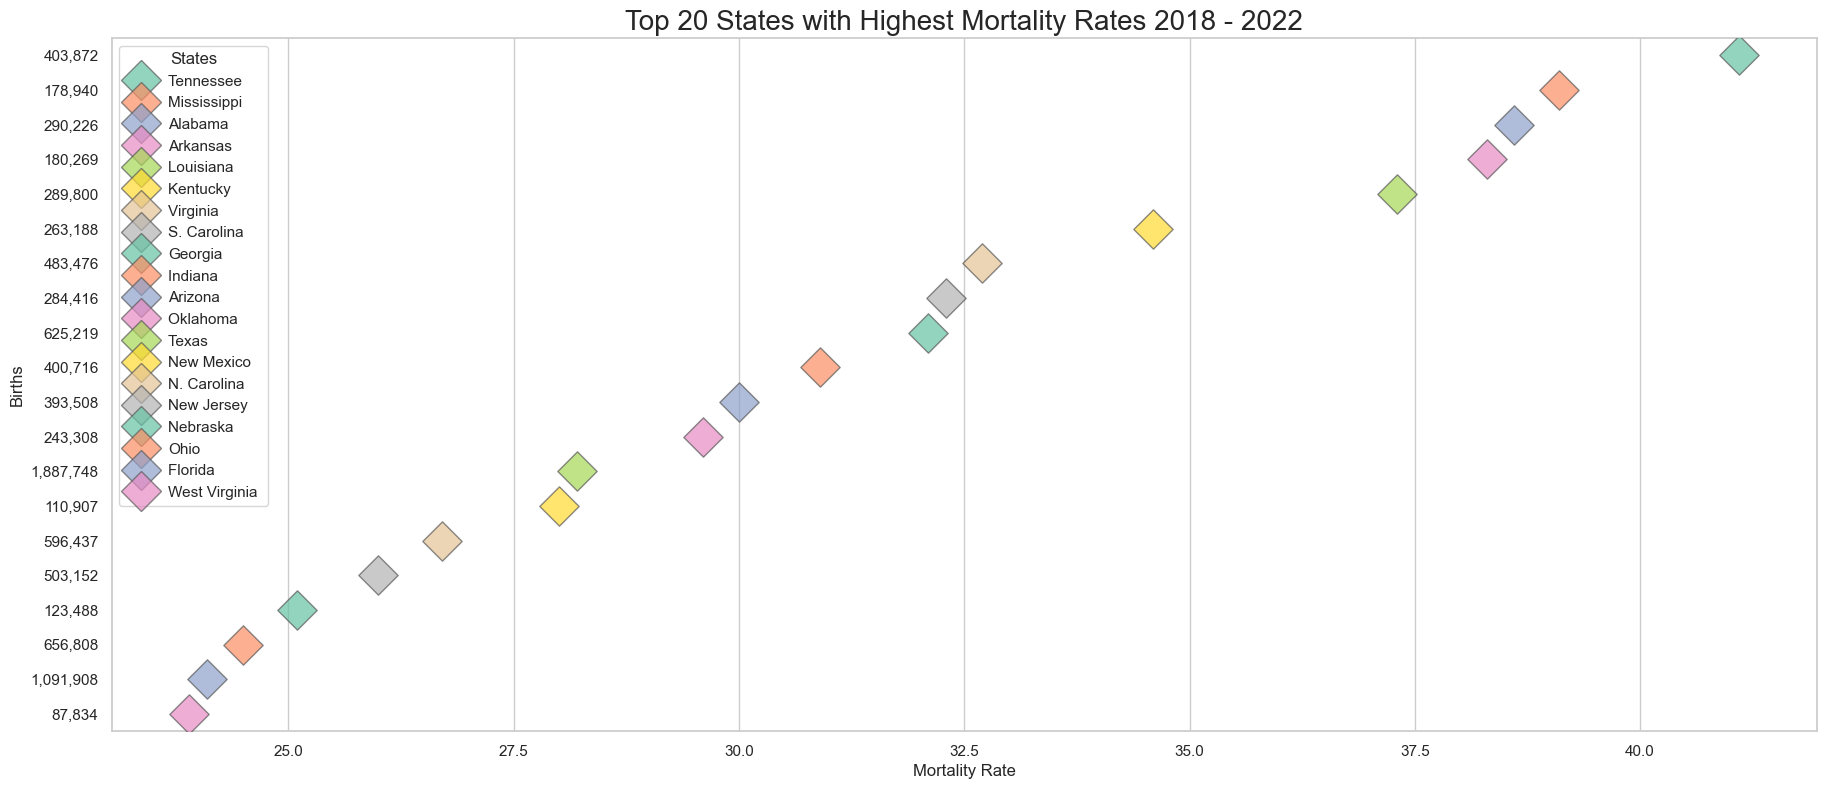

In [52]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="whitegrid")
fig, ax = plt.subplots(figsize=(22,9))

import numpy as np
import pandas as pd 

d = df.nlargest(20, 'Mortality Rate')

sns.stripplot(data=d, x='Mortality Rate', y='Births', hue = 'States', palette="Set2", s=20, marker="D", linewidth=1, alpha=.7)

plt.title("Top 20 States with Highest Mortality Rates 2018 - 2022", fontsize = 20)

plt.annotate('Source: https://data.cdc.gov/NCHS/VSRR-Provisional-Maternal-Death-Counts-and-Rates/e2d5-ggg7/about_data', xy=(-0.1,-0.2)) 
             # bbox=dict(boxstyle="round,pad=0.3",edgecolor="black", facecolor="aliceblue"))
plt.show()

#### Source: https://data.cdc.gov/NCHS/VSRR-Provisional-Maternal-Death-Counts-and-Rates/e2d5-ggg7/about_data

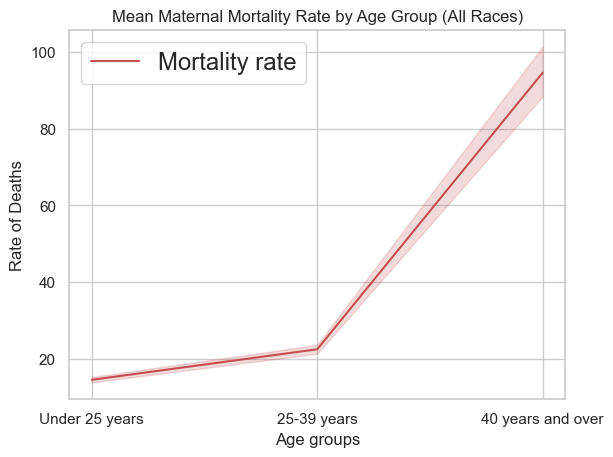

In [54]:
#create line chart to compare mean mortality rate by age 

import seaborn as sns

sns.lineplot(x = 'Subgroup', y = 'Maternal Mortality Rate', data = df_age_cln, orient = "x", color = 'r' )
plt.title('Mean Maternal Mortality Rate by Age Group (All Races)')
plt.legend(["Mortality rate"], fontsize = "x-large")
plt.xlabel('Age groups')
plt.ylabel('Rate of Deaths')
plt.show()


#### Maternal mortality rates vary greatly by age group between women under 25, those aged 25 to 39, and women over 40. The line plot paints a striking image of how age affects maternal mortality.

#### Maternal mortality rates for women under the age of 25 are typically lower than those for older age groups. This line plot indicates that younger women had fewer problems during pregnancy and childbirth. Maternal mortality rates for women aged 25 to 39 are generally not as low as for younger women, but also not as high as those over 40. The trend changes substantially for women after the age of 40. The line graph shows a dramatic increase in maternal mortality. This chart highlights the rising dangers associated with advanced maternal age. 

Source: 
NCHS, National Vital Statistics System. Estimates for 2022 and 2023 are based on provisional data. Estimates for 2019-2021 are based on final data (available from: https://www.cdc.gov/nchs/nvss/mortality_public_use_data.htm).

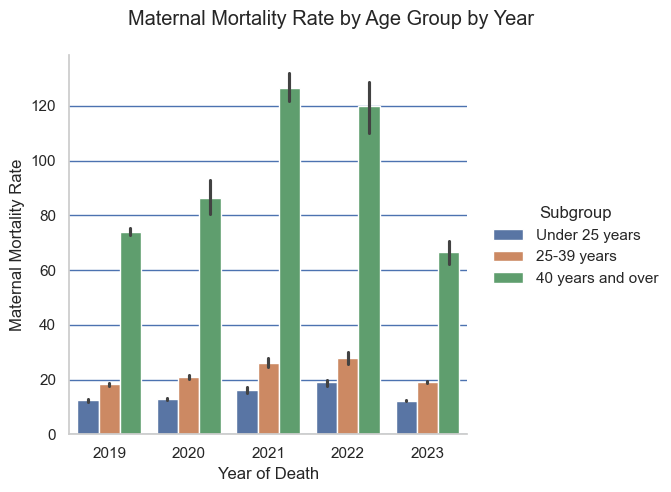

In [56]:
#create grouped bar chart to compare maternal mortality rate by age by year

import seaborn as sns

g = sns.catplot(data = df_age_cln, x = "Year of Death", y= "Maternal Mortality Rate", hue="Subgroup", kind = "bar")
g.fig.suptitle('Maternal Mortality Rate by Age Group by Year')
g.map(plt.grid, axis="y")
plt.show()


---
#### In conclusion this data reveals the that from 2019-2023 US Live births were stable for all race and ethnicity groups, American Indian and Alaskan Native and Black mothers suffered from signfincantly greater mortality rates compared to Asian, Hispanic, and white mothers, mortality rates for all race and ethnicity groups increased during COVID-19 surges, southern states had higher maternal mortality rates from 2018-2022, and women over 40 had higher mortality rates compared to younger women for all years (2019-2023).
---